In [12]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

In [13]:
spark = SparkSession.builder.appName('GroundWaterApp').getOrCreate()
df = spark.read.csv('/GroundWater/Nitrate.csv', inferSchema=True, header = True)

In [14]:
df.take(1)

[Row(Sl No=1, District=u'Bagalkot', Block=u'Badami', Location=u'Patadkal', Nitrate=61)]

In [15]:
df.registerTempTable('NitrateCopy')

In [16]:
df.show(100)

+-----+-----------+---------------+-------------------+-------+
|Sl No|   District|          Block|           Location|Nitrate|
+-----+-----------+---------------+-------------------+-------+
|    1|   Bagalkot|         Badami|           Patadkal|     61|
|    2|   Bagalkot|       Bagalkot|              Bevur|     64|
|    3|   Bagalkot|       Bagalkot|              Sirur|    179|
|    4|   Bagalkot|        Beelagi|              Bilgi|     74|
|    5|   Bagalkot|      Hunugunda|           Amingarh|    146|
|    6|   Bagalkot|      Hunugunda|              Ilkal|    180|
|    7|   Bagalkot|      Hunugunda|            Kodihal|    140|
|    8|   Bagalkot|      Hunugunda|         Nandwadige|     55|
|    9|   Bagalkot|      Hunugunda|               Tumb|     48|
|   10|   Bagalkot|     Jamakhandi|              Algur|   1420|
|   11|   Bagalkot|     Jamakhandi|            Kavatgi|     53|
|   12|   Bagalkot|     Jamakhandi|            Savalgi|     66|
|   13|   Bagalkot|         Mudhol|     

In [17]:
df.printSchema()

root
 |-- Sl No: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Nitrate: integer (nullable = true)



In [18]:
df.describe()

DataFrame[summary: string, Sl No: string, District: string, Block: string, Location: string, Nitrate: string]

In [19]:
df.describe('Nitrate').show()

+-------+------------------+
|summary|           Nitrate|
+-------+------------------+
|  count|               153|
|   mean|122.12418300653594|
| stddev|126.66498084261892|
|    min|                46|
|    max|              1420|
+-------+------------------+



In [20]:
import pandas as pd
pandas_df = df.toPandas()

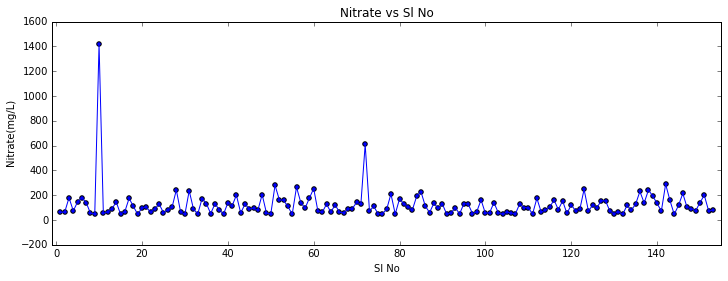

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(12,4),dpi=100)
plt.plot(pandas_df['Sl No'],pandas_df['Nitrate'])
plt.scatter(pandas_df['Sl No'],pandas_df['Nitrate'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Nitrate(mg/L)',color='black')
plt.title('Nitrate vs Sl No',color='black')
plt.xlim(-1,155)
plt.savefig('scatter nitrate')

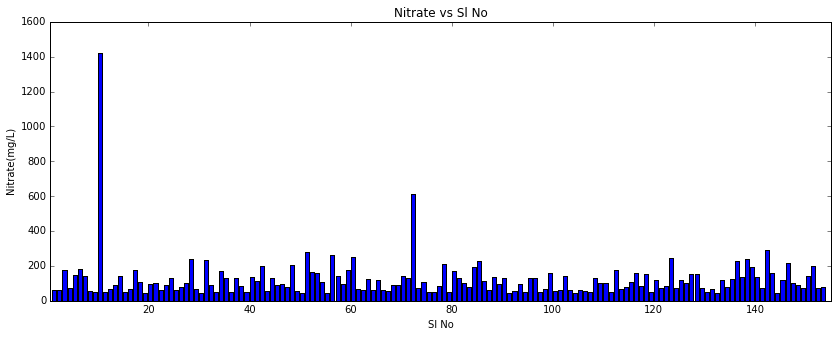

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(14,5),dpi=100)
plt.bar(pandas_df['Sl No'],pandas_df['Nitrate'],color=['blue'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Nitrate(mg/L)',color='black')
plt.title('Nitrate vs Sl No',color='black')
plt.xlim(0.5,155)
plt.savefig('bar nitrate')

In [23]:
nitratelowlevel = spark.sql("SELECT District,Block,Nitrate FROM NitrateCopy WHERE Nitrate BETWEEN 1 AND 50")
nitratelowlevel.show()

+---------+---------------+-------+
| District|          Block|Nitrate|
+---------+---------------+-------+
| Bagalkot|      Hunugunda|     48|
|Bangalore|Bangalore North|     48|
|Bangalore| Doddaballapura|     47|
|  Belgaum|         Athani|     46|
|  Belgaum|        Belgaum|     49|
|  Belgaum|      Saundatti|     48|
|    Bidar|       Homnabad|     47|
|  Bijapur|        Bijapur|     46|
|Davangere|  Harapanahalli|     50|
|  Dharwad|        Dharwar|     48|
| Gulbarga|      Chincholi|     46|
| Gulbarga|       Chitapur|     50|
|   Hassan|   Holenarsipur|     46|
|   Kodagu|        Mercara|     50|
|    Kolar|   Gauribidanur|     48|
|   Mandya|    Nagamangala|     50|
|   Mandya|    Nagamangala|     46|
|   Mysore|     T.Narsipur|     46|
+---------+---------------+-------+



In [24]:
nitratemedlevel = spark.sql("SELECT District,Block,Nitrate FROM NitrateCopy WHERE Nitrate BETWEEN 50 AND 100")
nitratemedlevel.show(100)

+-----------+---------------+-------+
|   District|          Block|Nitrate|
+-----------+---------------+-------+
|   Bagalkot|         Badami|     61|
|   Bagalkot|       Bagalkot|     64|
|   Bagalkot|        Beelagi|     74|
|   Bagalkot|      Hunugunda|     55|
|   Bagalkot|     Jamakhandi|     53|
|   Bagalkot|     Jamakhandi|     66|
|   Bagalkot|         Mudhol|     90|
|  Bangalore|Bangalore North|     67|
|  Bangalore| Doddaballapura|     97|
|  Bangalore|    Nelamangala|     63|
|  Bangalore|       Ramnagar|     90|
|    Bellary|        Bellary|     60|
|    Bellary|        Bellary|     82|
|    Belgaum|         Athani|     65|
|    Belgaum|     Bailhongal|     88|
|    Belgaum|        Hukkeri|     52|
|    Belgaum|      Saundatti|     84|
|      Bidar|   Basavakalyan|     57|
|      Bidar|         Bhalki|     89|
|      Bidar|         Bhalki|     94|
|      Bidar|         Bhalki|     79|
|      Bidar|       Homnabad|     56|
|    Bijapur|     Muddebihal|     95|
|    Bijapur

In [25]:
nitratehighlevel = spark.sql("SELECT District,Block,Nitrate FROM NitrateCopy WHERE Nitrate > 100")
nitratehighlevel.show(100)

+-----------+-------------+-------+
|   District|        Block|Nitrate|
+-----------+-------------+-------+
|   Bagalkot|     Bagalkot|    179|
|   Bagalkot|    Hunugunda|    146|
|   Bagalkot|    Hunugunda|    180|
|   Bagalkot|    Hunugunda|    140|
|   Bagalkot|   Jamakhandi|   1420|
|  Bangalore|       Anekal|    145|
|  Bangalore|  Devanahalli|    175|
|  Bangalore|  Devanahalli|    109|
|  Bangalore|   Kanakapura|    103|
|    Bellary|      Bellary|    128|
|    Bellary|       Hospet|    102|
|    Belgaum|       Athani|    242|
|    Belgaum|       Athani|    236|
|    Belgaum|      Chikodi|    173|
|    Belgaum|      Chikodi|    133|
|    Belgaum|      Rayabag|    130|
|      Bidar|        Aurad|    137|
|      Bidar|        Aurad|    115|
|      Bidar| Basavakalyan|    200|
|      Bidar|       Bhalki|    128|
|      Bidar|     Homnabad|    205|
|    Bijapur|     Bagewadi|    280|
|    Bijapur|     Bagewadi|    163|
|    Bijapur|      Bijapur|    158|
|    Bijapur|      Bijapur| 

In [26]:
nitratelowlevel.write.csv('nit_low.csv')
nitratemedlevel.write.csv('nit_med.csv')
nitratehighlevel.write.csv('nit_high.csv')

In [27]:
df1 = spark.read.csv('/user/SYSTEM/nit_high.csv/high.csv', inferSchema=False, header = False)
df1.show()

+---------+------------+----+
|      _c0|         _c1| _c2|
+---------+------------+----+
| Bagalkot|    Bagalkot| 179|
| Bagalkot|   Hunugunda| 146|
| Bagalkot|   Hunugunda| 180|
| Bagalkot|   Hunugunda| 140|
| Bagalkot|  Jamakhandi|1420|
|Bangalore|      Anekal| 145|
|Bangalore| Devanahalli| 175|
|Bangalore| Devanahalli| 109|
|Bangalore|  Kanakapura| 103|
|  Bellary|     Bellary| 128|
|  Bellary|      Hospet| 102|
|  Belgaum|      Athani| 242|
|  Belgaum|      Athani| 236|
|  Belgaum|     Chikodi| 173|
|  Belgaum|     Chikodi| 133|
|  Belgaum|     Rayabag| 130|
|    Bidar|       Aurad| 137|
|    Bidar|       Aurad| 115|
|    Bidar|Basavakalyan| 200|
|    Bidar|      Bhalki| 128|
+---------+------------+----+
only showing top 20 rows



In [28]:
df1 = df1.withColumnRenamed('_c0','District')
df1 = df1.withColumnRenamed('_c1','Block')
df1 = df1.withColumnRenamed('_c2','Nitrate')
df1.show()

+---------+------------+-------+
| District|       Block|Nitrate|
+---------+------------+-------+
| Bagalkot|    Bagalkot|    179|
| Bagalkot|   Hunugunda|    146|
| Bagalkot|   Hunugunda|    180|
| Bagalkot|   Hunugunda|    140|
| Bagalkot|  Jamakhandi|   1420|
|Bangalore|      Anekal|    145|
|Bangalore| Devanahalli|    175|
|Bangalore| Devanahalli|    109|
|Bangalore|  Kanakapura|    103|
|  Bellary|     Bellary|    128|
|  Bellary|      Hospet|    102|
|  Belgaum|      Athani|    242|
|  Belgaum|      Athani|    236|
|  Belgaum|     Chikodi|    173|
|  Belgaum|     Chikodi|    133|
|  Belgaum|     Rayabag|    130|
|    Bidar|       Aurad|    137|
|    Bidar|       Aurad|    115|
|    Bidar|Basavakalyan|    200|
|    Bidar|      Bhalki|    128|
+---------+------------+-------+
only showing top 20 rows



In [29]:
df2 = spark.read.csv('/user/SYSTEM/nit_med.csv/med.csv', inferSchema=False, header = False)
df2.show()

+---------+---------------+---+
|      _c0|            _c1|_c2|
+---------+---------------+---+
| Bagalkot|         Badami| 61|
| Bagalkot|       Bagalkot| 64|
| Bagalkot|        Beelagi| 74|
| Bagalkot|      Hunugunda| 55|
| Bagalkot|     Jamakhandi| 53|
| Bagalkot|     Jamakhandi| 66|
| Bagalkot|         Mudhol| 90|
|Bangalore|Bangalore North| 67|
|Bangalore| Doddaballapura| 97|
|Bangalore|    Nelamangala| 63|
|Bangalore|       Ramnagar| 90|
|  Bellary|        Bellary| 60|
|  Bellary|        Bellary| 82|
|  Belgaum|         Athani| 65|
|  Belgaum|     Bailhongal| 88|
|  Belgaum|        Hukkeri| 52|
|  Belgaum|      Saundatti| 84|
|    Bidar|   Basavakalyan| 57|
|    Bidar|         Bhalki| 89|
|    Bidar|         Bhalki| 94|
+---------+---------------+---+
only showing top 20 rows



In [30]:
df2 = df2.withColumnRenamed('_c0','District')
df2 = df2.withColumnRenamed('_c1','Block')
df2 = df2.withColumnRenamed('_c2','Nitrate')
df2.show()

+---------+---------------+-------+
| District|          Block|Nitrate|
+---------+---------------+-------+
| Bagalkot|         Badami|     61|
| Bagalkot|       Bagalkot|     64|
| Bagalkot|        Beelagi|     74|
| Bagalkot|      Hunugunda|     55|
| Bagalkot|     Jamakhandi|     53|
| Bagalkot|     Jamakhandi|     66|
| Bagalkot|         Mudhol|     90|
|Bangalore|Bangalore North|     67|
|Bangalore| Doddaballapura|     97|
|Bangalore|    Nelamangala|     63|
|Bangalore|       Ramnagar|     90|
|  Bellary|        Bellary|     60|
|  Bellary|        Bellary|     82|
|  Belgaum|         Athani|     65|
|  Belgaum|     Bailhongal|     88|
|  Belgaum|        Hukkeri|     52|
|  Belgaum|      Saundatti|     84|
|    Bidar|   Basavakalyan|     57|
|    Bidar|         Bhalki|     89|
|    Bidar|         Bhalki|     94|
+---------+---------------+-------+
only showing top 20 rows



In [31]:
df3 = spark.read.csv('/user/SYSTEM/nit_low.csv/low.csv', inferSchema=False, header = False)
df3.show()

+---------+---------------+---+
|      _c0|            _c1|_c2|
+---------+---------------+---+
| Bagalkot|      Hunugunda| 48|
|Bangalore|Bangalore North| 48|
|Bangalore| Doddaballapura| 47|
|  Belgaum|         Athani| 46|
|  Belgaum|        Belgaum| 49|
|  Belgaum|      Saundatti| 48|
|    Bidar|       Homnabad| 47|
|  Bijapur|        Bijapur| 46|
|Davangere|  Harapanahalli| 50|
|  Dharwad|        Dharwar| 48|
| Gulbarga|      Chincholi| 46|
| Gulbarga|       Chitapur| 50|
|   Hassan|   Holenarsipur| 46|
|   Kodagu|        Mercara| 50|
|    Kolar|   Gauribidanur| 48|
|   Mandya|    Nagamangala| 50|
|   Mandya|    Nagamangala| 46|
|   Mysore|     T.Narsipur| 46|
+---------+---------------+---+



In [32]:
df3 = df3.withColumnRenamed('_c0','District')
df3 = df3.withColumnRenamed('_c1','Block')
df3 = df3.withColumnRenamed('_c2','Nitrate')
df3.show()

+---------+---------------+-------+
| District|          Block|Nitrate|
+---------+---------------+-------+
| Bagalkot|      Hunugunda|     48|
|Bangalore|Bangalore North|     48|
|Bangalore| Doddaballapura|     47|
|  Belgaum|         Athani|     46|
|  Belgaum|        Belgaum|     49|
|  Belgaum|      Saundatti|     48|
|    Bidar|       Homnabad|     47|
|  Bijapur|        Bijapur|     46|
|Davangere|  Harapanahalli|     50|
|  Dharwad|        Dharwar|     48|
| Gulbarga|      Chincholi|     46|
| Gulbarga|       Chitapur|     50|
|   Hassan|   Holenarsipur|     46|
|   Kodagu|        Mercara|     50|
|    Kolar|   Gauribidanur|     48|
|   Mandya|    Nagamangala|     50|
|   Mandya|    Nagamangala|     46|
|   Mysore|     T.Narsipur|     46|
+---------+---------------+-------+

